In [4]:
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime

C:\Anaconda2\lib\site-packages\IPython\core\magics\extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension as a python package.
  "as a python package.", UserWarning)


Installed autotime.py. To use it, type:
  %load_ext autotime


In [69]:
# COLUMNS:
# 0        1         2       3   4      5              6   7   8   9
# NAMELAST,NAMEFIRST,NAMEMID,UIN,BDGNBR,Type of Access,TOA,POA,TOD,POD,
# 10             11              12            13               14
# APPT_MADE_DATE,APPT_START_DATE,APPT_END_DATE,APPT_CANCEL_DATE,Total_People,
# 15             16   17            18              19              
# LAST_UPDATEDBY,POST,LastEntryDate,TERMINAL_SUFFIX,visitee_namelast,
# 20                21          22           23               24                
# visitee_namefirst,MEETING_LOC,MEETING_ROOM,CALLER_NAME_LAST,CALLER_NAME_FIRST,
# 25          26          27
# CALLER_ROOM,Description,RELEASE_DATE

%matplotlib inline 

import numpy as np
import matplotlib as plot
import matplotlib.pyplot as plt
import pdb
import pandas as pd

time: 238 ms


In [95]:
df = pd.read_csv('../datasets/White_House_Visitor_Records_Requests.csv',
                    parse_dates=['APPT_START_DATE'], 
                    dayfirst=True,
                    #index_col=['NAMELAST','NAMEFIRST'],
                    usecols=['NAMELAST', 'NAMEFIRST', 'APPT_START_DATE'], # reads only these columns to memory
                    nrows=10000) # for faster testing, remove for efective use of the dataframe
pd.set_option('large_repr', 'info') # will show dataframe summary

time: 2.89 s


In [111]:
#pd.to_datetime(df['APPT_START_DATE'], format='%Y-%m-%d')
df['APPT_START_DATE'] = df['APPT_START_DATE'].apply(pd.datetools.normalize_date) # removes the hour

time: 86 ms


In [97]:
print ('Summary:')
print (df)
print ('Example data:')
print (df[:10])

Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
NAMELAST           10000 non-null object
NAMEFIRST          10000 non-null object
APPT_START_DATE    10000 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 234.4+ KB

Example data:
   NAMELAST   NAMEFIRST APPT_START_DATE
0  MATTHEWS        GARY      2010-05-19
1     DOYLE    PATRICIA      2010-05-19
2  MATTHEWS       SANDY      2010-05-19
3    MALONE      SHARON      2010-05-19
4    WILSON  WELLINGTON      2010-05-19
5     ABEBE        SABA      2010-05-19
6   ABRAHAM       ABEBE      2010-05-19
7   ABRAHAM   AZENEGASH      2010-05-19
8   ABRAHAM       JIITU      2010-05-19
9   ABRAHAM    YOHANNES      2010-05-19
time: 20 ms


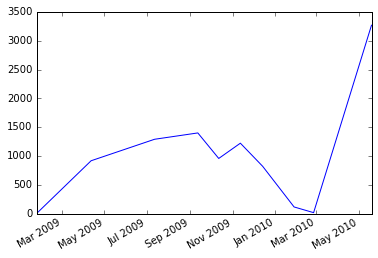

time: 296 ms


In [98]:
visit_counts = df['APPT_START_DATE'].value_counts()
visit_counts[:10].plot()

In [110]:
has_last_name = df['NAMELAST'] == "ABRAHAM"
has_first_name = df['NAMEFIRST'] == "JIITU"
print ("Number of visits from JIITU ABRAHAM: ")
print (len(df[has_last_name & has_first_name]))

has_last_name = df['NAMELAST'] == "PERES"
has_first_name = df['NAMEFIRST'] == "RAFAEL"
print ("Number of visits from RAFAEL PERES: ")
print (len(df[has_last_name & has_first_name]))

Number of visits from JIITU ABRAHAM: 
2
Number of visits from RAFAEL PERES: 
0
time: 16 ms
